# <center><b> <em> Feature Engineering </em> </b></center>

## <font color="green"> | - Import des Biblio et Dataframe</font>

In [72]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import numpy as np

In [73]:
# Read the XLSX file
data = pd.read_csv("data/dataset_model_silver.csv")

In [74]:
data.head()

,titre,date,genre,duree,realisateur,distributeur,acteurs,nationalites,langue_d_origine,type_film,annee_production,nombre_article,description,film_id_allocine,image,boxoffice
0,La Maison de la mort,1934-04-06,Epouvante-horreur,72,James Whale,Carlotta Films,"Boris Karloff,Melvyn Douglas,Charles Laughton",U.S.A.,Anglais,Long-métrage,1932,15,Alors qu’ils traversent une région isolée du p...,43316,https://fr.web.img3.acsta.net/c_310_420/pictur...,911
1,La Vie est belle,1947-12-10,Comédie dramatique_Comédie_Drame_Fantastique,129,Frank Capra,Swashbuckler Films,"James Stewart,Donna Reed,Lionel Barrymore",U.S.A.,Anglais,Long-métrage,1946,6,Le décès de son père oblige un homme à reprend...,5762,https://fr.web.img6.acsta.net/c_310_420/pictur...,734571
2,Cendrillon,1950-12-01,Animation_Comédie musicale_Fantastique_Romance,75,Wilfred Jackson,Buena Vista International,"Ilene Woods,Eleanor Audley,Verna Felton",U.S.A.,Anglais,Long-métrage,1950,217,"Cendrillon, servante de sa marâtre et de ses d...",38826,https://fr.web.img5.acsta.net/c_310_420/medias...,38457
3,La Passagère,1964-10-28,Drame,62,Andrzej Munk,Malavida Films,"Anna Ciepielewska,Aleksandra Slaska,Jan Kreczmar",Pologne,Polonais,Long-métrage,1961,8,"Liza subit un choc, quand, lors d'une croisièr...",2314,https://fr.web.img6.acsta.net/c_310_420/pictur...,1420
4,La Planète des singes,1968-04-26,Drame_Science fiction,110,Franklin J. Schaffner,Swashbuckler Films,"Charlton Heston,Roddy McDowall,Kim Hunter",U.S.A.,Anglais,Long-métrage,1968,1,"Egaré dans l'espace-temps, un engin spatial am...",12791,https://fr.web.img6.acsta.net/c_310_420/pictur...,175773


In [75]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7015 entries, 0 to 7014
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   titre             7015 non-null   object
 1   date              7015 non-null   object
 2   genre             7015 non-null   object
 3   duree             7015 non-null   int64 
 4   realisateur       7015 non-null   object
 5   distributeur      7015 non-null   object
 6   acteurs           7015 non-null   object
 7   nationalites      7015 non-null   object
 8   langue_d_origine  7015 non-null   object
 9   type_film         7015 non-null   object
 10  annee_production  7015 non-null   int64 
 11  nombre_article    7015 non-null   int64 
 12  description       6285 non-null   object
 13  film_id_allocine  7015 non-null   int64 
 14  image             7015 non-null   object
 15  boxoffice         7015 non-null   int64 
dtypes: int64(5), object(11)
memory usage: 877.0+ KB


In [76]:
data.shape

(7015, 16)

## <font color="green"> || - Missing Data </font>

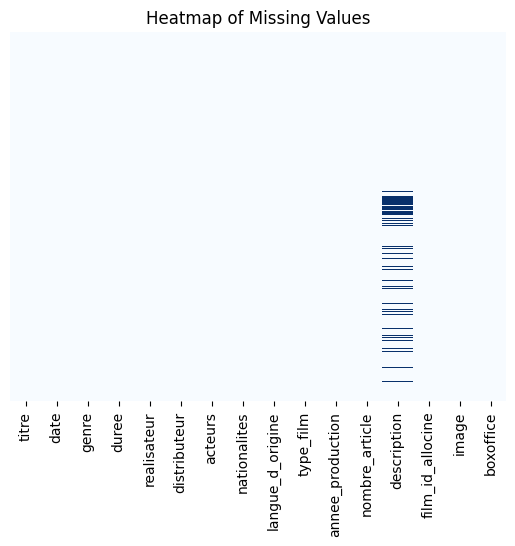

In [77]:
# Create a figure and axes for the plot
fig, ax = plt.subplots()
sns.heatmap(data.isnull(), ax=ax, yticklabels=False, cbar=False, cmap="Blues")
ax.set_title("Heatmap of Missing Values")
plt.show()

In [78]:
data.isnull().sum()

titre                 0
date                  0
genre                 0
duree                 0
realisateur           0
distributeur          0
acteurs               0
nationalites          0
langue_d_origine      0
type_film             0
annee_production      0
nombre_article        0
description         730
film_id_allocine      0
image                 0
boxoffice             0
dtype: int64

## <font color="green"> ||| - Duplicated Data </font>

In [79]:
data.duplicated().sum()

0

## <font color="green"> IV - Ajout colonnes Awards et Nominations </font>

In [80]:
# # Extract the number of awards and nominations using regular expressions
# data['awards'] = data['recompenses'].apply(lambda x: int(re.search(r'(\d+) prix', str(x)).group(1)) if re.search(r'(\d+) prix', str(x)) else 0)
# data['nominations'] = data['recompenses'].apply(lambda x: int(re.search(r'(\d+) nominations', str(x)).group(1)) if re.search(r'(\d+) nominations', str(x)) else 0)

In [81]:
# # Drop the 'recompenses' column if no longer needed
# data.drop(columns=['recompenses'], inplace=True)

In [82]:
data.head()

,titre,date,genre,duree,realisateur,distributeur,acteurs,nationalites,langue_d_origine,type_film,annee_production,nombre_article,description,film_id_allocine,image,boxoffice
0,La Maison de la mort,1934-04-06,Epouvante-horreur,72,James Whale,Carlotta Films,"Boris Karloff,Melvyn Douglas,Charles Laughton",U.S.A.,Anglais,Long-métrage,1932,15,Alors qu’ils traversent une région isolée du p...,43316,https://fr.web.img3.acsta.net/c_310_420/pictur...,911
1,La Vie est belle,1947-12-10,Comédie dramatique_Comédie_Drame_Fantastique,129,Frank Capra,Swashbuckler Films,"James Stewart,Donna Reed,Lionel Barrymore",U.S.A.,Anglais,Long-métrage,1946,6,Le décès de son père oblige un homme à reprend...,5762,https://fr.web.img6.acsta.net/c_310_420/pictur...,734571
2,Cendrillon,1950-12-01,Animation_Comédie musicale_Fantastique_Romance,75,Wilfred Jackson,Buena Vista International,"Ilene Woods,Eleanor Audley,Verna Felton",U.S.A.,Anglais,Long-métrage,1950,217,"Cendrillon, servante de sa marâtre et de ses d...",38826,https://fr.web.img5.acsta.net/c_310_420/medias...,38457
3,La Passagère,1964-10-28,Drame,62,Andrzej Munk,Malavida Films,"Anna Ciepielewska,Aleksandra Slaska,Jan Kreczmar",Pologne,Polonais,Long-métrage,1961,8,"Liza subit un choc, quand, lors d'une croisièr...",2314,https://fr.web.img6.acsta.net/c_310_420/pictur...,1420
4,La Planète des singes,1968-04-26,Drame_Science fiction,110,Franklin J. Schaffner,Swashbuckler Films,"Charlton Heston,Roddy McDowall,Kim Hunter",U.S.A.,Anglais,Long-métrage,1968,1,"Egaré dans l'espace-temps, un engin spatial am...",12791,https://fr.web.img6.acsta.net/c_310_420/pictur...,175773


## <font color="green"> V - Ajout colonnes nombre Acteurs Connus </font>

In [83]:

# # Charger le fichier "top_acteur.csv" contenant les acteurs connus dans un DataFrame
df_acteurs_connus = pd.read_csv('data/top_acteurs.csv')


In [84]:
data['acteurs']

0           Boris Karloff,Melvyn Douglas,Charles Laughton
1               James Stewart,Donna Reed,Lionel Barrymore
2                 Ilene Woods,Eleanor Audley,Verna Felton
3        Anna Ciepielewska,Aleksandra Slaska,Jan Kreczmar
4               Charlton Heston,Roddy McDowall,Kim Hunter
                              ...                        
7010    Christian Clavier,Isabelle Nanty,Jennie-Anne W...
7011                Hiba Ghafry,Matsen Montsma,Kees Prins
7012          Nanni Moretti,Margherita Buy,Silvio Orlando
7013             Nassim Lyes,Loryn Nounay,Olivier Gourmet
7014          Emilio Sakraya,Mona Pirzad,Hussein Eliraqui
Name: acteurs, Length: 7015, dtype: object

In [85]:
# Créer un ensemble de noms d'acteurs connus à partir de la base de données des acteurs connus
acteurs_connus = set(df_acteurs_connus['acteur'])

# Fonction pour compter le nombre d'acteurs connus dans une liste d'acteurs
def compter_acteurs_connus(liste_acteurs):
    return len([acteur for acteur in liste_acteurs.split(',') if acteur in acteurs_connus])

# Appliquer la fonction pour créer la colonne 'nombre_acteurs_connus'
data['nombre_acteurs_connus'] = data['acteurs'].apply(compter_acteurs_connus)

# Fonction pour filtrer les acteurs connus dans une liste d'acteurs
def filtrer_acteurs_connus(liste_acteurs):
    return [acteur for acteur in liste_acteurs.split(',') if acteur in acteurs_connus]

# Appliquer la fonction pour créer la colonne 'acteurs_connus'
data['acteurs_connus'] = data['acteurs'].apply(filtrer_acteurs_connus)
data

,titre,date,genre,duree,realisateur,distributeur,acteurs,nationalites,langue_d_origine,type_film,annee_production,nombre_article,description,film_id_allocine,image,boxoffice,nombre_acteurs_connus,acteurs_connus
0,La Maison de la mort,1934-04-06,Epouvante-horreur,72,James Whale,Carlotta Films,"Boris Karloff,Melvyn Douglas,Charles Laughton",U.S.A.,Anglais,Long-métrage,1932,15,Alors qu’ils traversent une région isolée du p...,43316,https://fr.web.img3.acsta.net/c_310_420/pictur...,911,0,[]
1,La Vie est belle,1947-12-10,Comédie dramatique_Comédie_Drame_Fantastique,129,Frank Capra,Swashbuckler Films,"James Stewart,Donna Reed,Lionel Barrymore",U.S.A.,Anglais,Long-métrage,1946,6,Le décès de son père oblige un homme à reprend...,5762,https://fr.web.img6.acsta.net/c_310_420/pictur...,734571,0,[]
2,Cendrillon,1950-12-01,Animation_Comédie musicale_Fantastique_Romance,75,Wilfred Jackson,Buena Vista International,"Ilene Woods,Eleanor Audley,Verna Felton",U.S.A.,Anglais,Long-métrage,1950,217,"Cendrillon, servante de sa marâtre et de ses d...",38826,https://fr.web.img5.acsta.net/c_310_420/medias...,38457,0,[]
3,La Passagère,1964-10-28,Drame,62,Andrzej Munk,Malavida Films,"Anna Ciepielewska,Aleksandra Slaska,Jan Kreczmar",Pologne,Polonais,Long-métrage,1961,8,"Liza subit un choc, quand, lors d'une croisièr...",2314,https://fr.web.img6.acsta.net/c_310_420/pictur...,1420,0,[]
4,La Planète des singes,1968-04-26,Drame_Science fiction,110,Franklin J. Schaffner,Swashbuckler Films,"Charlton Heston,Roddy McDowall,Kim Hunter",U.S.A.,Anglais,Long-métrage,1968,1,"Egaré dans l'espace-temps, un engin spatial am...",12791,https://fr.web.img6.acsta.net/c_310_420/pictur...,175773,0,[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7010,Les Vengeances de Maître Poutifard,2023-06-28,Comédie_Famille,90,Pierre-François Martin-Laval,UGC Distribution,"Christian Clavier,Isabelle Nanty,Jennie-Anne W...",France,Français,Long-métrage,2023,5,"Instituteur à la retraite, Robert Poutifard n'...",306417,https://fr.web.img3.acsta.net/c_310_420/pictur...,180735,1,[Christian Clavier]
7011,"Chonchon, le plus mignon des cochons",2023-06-28,Animation_Aventure_Famille,70,Mascha Halberstad,The Jokers / Les Bookmakers,"Hiba Ghafry,Matsen Montsma,Kees Prins",Pays-Bas,Néerlandais,Long-métrage,2022,2,"Lorsque Babs, 9 ans, reçoit de son grand-père ...",299549,https://fr.web.img3.acsta.net/c_310_420/pictur...,6286,0,[]
7012,Vers un avenir radieux,2023-06-28,Comédie dramatique_Comédie_Drame,95,Nanni Moretti,Le Pacte,"Nanni Moretti,Margherita Buy,Silvio Orlando",Italie,Italien,Long-métrage,2023,26,"Giovanni, cinéaste italien renommé, s’apprête ...",304632,https://fr.web.img6.acsta.net/c_310_420/pictur...,91786,0,[]
7013,Farang,2023-06-28,Action,99,Xavier Gens,StudioCanal,"Nassim Lyes,Loryn Nounay,Olivier Gourmet",France,Français,Long-métrage,2023,16,Sam est un détenu exemplaire. A quelques mois ...,308295,https://fr.web.img2.acsta.net/c_310_420/pictur...,79426,0,[]


## <font color="green"> VI - Ajout colonnes Réalisateur Connus </font>

In [86]:

# Check if "Quentin Tarantino" exists in the 'réalisateur' column
if data['realisateur'].str.contains('Quentin Tarantino', case=False).any():
    print("Quentin Tarantino exists in the 'réalisateur' column.")
else:
    print("Quentin Tarantino does not exist in the 'realisateur' column.")

Quentin Tarantino exists in the 'réalisateur' column.


In [87]:
# Créer un ensemble des noms des acteurs connus à partir de la base de données des top acteurs
acteurs_connus = set(df_acteurs_connus['acteur'])

# Créer une nouvelle colonne dans le DataFrame 'data' pour indiquer la présence dans le CSV
data['realisateur_connu'] = data['realisateur'].isin(acteurs_connus)

# Convertir les valeurs True/False en 1/0 dans la colonne 'realisateur_connu'
data['realisateur_connu'] = data['realisateur_connu'].astype(int)

data.head()
data['realisateur_connu']

0       0
1       0
2       0
3       0
4       0
       ..
7010    0
7011    0
7012    0
7013    0
7014    0
Name: realisateur_connu, Length: 7015, dtype: int64

In [88]:
data['genres'] = data['genres'].str.replace("[\[\]']", "", regex=True)
data

KeyError: 'genres'

In [ ]:
# Assuming you have already split the 'genre' column by underscores to get individual genre names
data['genres'] = data['genres'].str.split('_')

# Get a set of all unique genres
unique_genres = set(g for row in data['genres'] for g in row)

# Create binary columns for each unique genre
for genre in unique_genres:
    data[genre] = data['genres'].apply(lambda x: 1 if genre in x else 0)

data


,titre,date,durée,réalisateur,distributeur,acteurs,nationalités,langue_d_origine,type_film,annee_production,...,Epouvante-horreur,Drame,Comédie,Drama,Judiciaire,Arts Martiaux,Action,Divers,Western,Animation
0,"Super Mario Bros, le film",2023-05-04,92,Aaron Horvath,Universal Pictures International France,"['Pierre Tessier', 'Chris Pratt', 'Jérémie Cov...",U.S.A.,['Anglais'],Long-métrage,2023,...,0,0,1,0,0,0,0,0,0,1
1,Les Vengeances de Maître Poutifard,NaN,90,Pierre-François Martin-Laval,UGC Distribution,"['Christian Clavier', 'Isabelle Nanty', 'Jenni...",France,['Français'],Long-métrage,2023,...,0,0,1,0,0,0,0,0,0,0
2,Des mains en or,2023-07-06,90,Isabelle Mergault,Zinc Film,"['Lambert Wilson', 'Josiane Balasko', 'Sylvie ...",France,['Français'],Long-métrage,2023,...,0,0,1,0,0,0,0,0,0,0
3,The Covenant,NaN,123,Guy Ritchie,inconnu,"['Jake Gyllenhaal', 'Dar Salim', 'Alexander Lu...",Grande-Bretagne,['Anglais'],Long-métrage,2023,...,0,0,0,0,0,0,1,0,0,0
4,"Cléo, Melvil et moi",2023-05-07,73,Arnaud Viard,Moonlight Films Distribution,"['Arnaud Viard', 'Marianne Denicourt', 'Romane...",France,['Français'],Long-métrage,2023,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10721,La Mujer de mi hermano,NaN,89,Ricardo de Montreuil,inconnu,"['Bárbara Mori', 'Christian Meier', 'Manolo Ca...",Argentine,['Espagnol'],Long-métrage,2005,...,0,1,0,0,0,0,0,0,0,0
10722,Gracie,NaN,97,Davis Guggenheim,inconnu,"['Carly Schroeder', 'Dermot Mulroney', 'Jesse ...",U.S.A.,['Anglais'],Long-métrage,2007,...,0,1,0,0,0,0,0,0,0,0
10723,Keeping up with the Steins,NaN,99,Scott Marshall,inconnu,"['Jami Gertz', 'Daryl Hannah', 'Garry Marshall']",U.S.A.,['Anglais'],Long-métrage,2006,...,0,0,1,0,0,0,0,0,0,0
10724,Impractical Jokers: The Movie,NaN,93,Chris Henchy,inconnu,"['Brian Quinn', 'Joe Gatto', 'Sal Vulcano']",U.S.A.,['Anglais'],Long-métrage,2020,...,0,0,1,0,0,0,0,0,0,0


In [ ]:
data.columns

Index(['titre', 'date', 'durée', 'réalisateur', 'distributeur', 'acteurs',
       'nationalités', 'langue_d_origine', 'type_film', 'annee_production',
       'box_office_total', 'note_presse', 'note_spectateurs', 'nombre_article',
       'description', 'boxoffice', 'genres', 'awards', 'nominations',
       'nombre_acteurs_connus', 'acteurs_connus', 'realisateur_connu',
       'Famille', 'Bollywood', 'Thriller', 'Sport event', 'Comédie dramatique',
       'Erotique', 'Policier', 'Espionnage', 'Expérimental', 'Musical',
       'Comédie musicale', 'Science fiction', 'Péplum', 'Guerre', 'Romance',
       'Fantastique', 'Biopic', 'Historique', 'Aventure', 'Epouvante-horreur',
       'Drame', 'Comédie', 'Drama', 'Judiciaire', 'Arts Martiaux', 'Action',
       'Divers', 'Western', 'Animation'],
      dtype='object')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10726 entries, 0 to 10725
Data columns (total 51 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   titre                  10726 non-null  object 
 1   date                   4157 non-null   object 
 2   durée                  10726 non-null  int64  
 3   réalisateur            10726 non-null  object 
 4   distributeur           10726 non-null  object 
 5   acteurs                10726 non-null  object 
 6   nationalités           10726 non-null  object 
 7   langue_d_origine       10726 non-null  object 
 8   type_film              10726 non-null  object 
 9   annee_production       10726 non-null  int64  
 10  box_office_total       8819 non-null   float64
 11  note_presse            10726 non-null  float64
 12  note_spectateurs       10726 non-null  float64
 13  nombre_article         10300 non-null  float64
 14  description            9657 non-null   object 
 15  bo

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10726 entries, 0 to 10725
Data columns (total 51 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   titre                  10726 non-null  object 
 1   date                   4157 non-null   object 
 2   durée                  10726 non-null  int64  
 3   réalisateur            10726 non-null  object 
 4   distributeur           10726 non-null  object 
 5   acteurs                10726 non-null  object 
 6   nationalités           10726 non-null  object 
 7   langue_d_origine       10726 non-null  object 
 8   type_film              10726 non-null  object 
 9   annee_production       10726 non-null  int64  
 10  box_office_total       8819 non-null   float64
 11  note_presse            10726 non-null  float64
 12  note_spectateurs       10726 non-null  float64
 13  nombre_article         10300 non-null  float64
 14  description            9657 non-null   object 
 15  bo

## <font color="green"> VI- Export gold Data </font>

In [ ]:
#EXporter la data dans un Csv 
data.to_csv('data/dataset_gold.csv', index=False)
data.to_csv('../Modeling/dataset_gold.csv', index=False)